# Part 1

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np


def Calculate_Implied_Volatility(Ticker):
    data = yf.download(Ticker, start='2024-03-11', end='2025-03-11', interval='1d')
    Price = np.array(data['Close'])
    return np.std(Price) * (Price.size**0.5)

AAPL = Calculate_Implied_Volatility('AAPL')
TSLA = Calculate_Implied_Volatility('TSLA')
CSCO = Calculate_Implied_Volatility('CSCO')
XOM = Calculate_Implied_Volatility('XOM')
INTC = Calculate_Implied_Volatility('INTC')
LLY = Calculate_Implied_Volatility('LLY')
PFE = Calculate_Implied_Volatility('PFE')
AMC = Calculate_Implied_Volatility('AMC')
MET = Calculate_Implied_Volatility('MET')
QCOM = Calculate_Implied_Volatility('QCOM')
print('Apple', AAPL
      ,'TSLA', TSLA,
      'CSCO', CSCO,
      'XOM', XOM,
      'INTC', INTC, 
      'LLY', LLY,
      'PFE', PFE,
      'AMC', AMC, 
      'MET', MET,
      'QCOM', QCOM)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Apple 396.63736304434155 TSLA 1372.5439984565826 CSCO 99.39821452518372 XOM 65.87990955854372 INTC 107.40716058215442 LLY 1069.3392641437517 PFE 20.765092940245463 AMC 12.159718681745197 MET 100.01537768359825 QCOM 250.46686946954915


### Top 5 Most Volitle Stocks Selected:
1. Tesla (1372)
2. Eli Lilly (1069)
3. Apple (369)
4. Qualcomm (250)
5. Intel (107)

# Part 2

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class TradingProfessional:
    def __init__(self, df: pd.DataFrame, price_col: str = 'Close'):
       
        self.df = df.copy()  
        self.price_col = price_col

    def calculate_bollinger_bands(self, window: int = 20, num_std: int = 2) -> pd.DataFrame:
        self.df['SMA'] = self.df[self.price_col].rolling(window=window).mean()
        self.df['STD'] = self.df[self.price_col].rolling(window=window).std()
        self.df['Upper Band'] = self.df['SMA'] + num_std * self.df['STD']
        self.df['Lower Band'] = self.df['SMA'] - num_std * self.df['STD']
        return self.df[['SMA', 'Upper Band', 'Lower Band']]

    def generate_signals(self) -> pd.Series:

        self.df['Signal'] = 'Hold'
        buy_signal = (
            (self.df[self.price_col] >= self.df['Lower Band']) &
            (self.df[self.price_col].shift(1) < self.df['Lower Band'])
            )
        self.df.loc[buy_signal, 'Signal'] = 'Buy'
        
        sell_signal = (
            (self.df[self.price_col] <= self.df['Upper Band']) &
            (self.df[self.price_col].shift(1) > self.df['Upper Band'])
            )
        self.df.loc[sell_signal, 'Signal'] = 'Sell'
        
        return self.df['Signal']

    def backtest_strategy(self) -> pd.DataFrame:

        positions = []
        position = 0  
        
        for signal in self.df['Signal']:
            if signal == 'Buy':
                position = 1  
            elif signal == 'Sell':
                position = 0  
            
            positions.append(position)
            
        self.df['Position'] = positions
        
        
        self.df['Daily Return'] = self.df[self.price_col].pct_change()
        
        self.df['Strategy Return'] = self.df['Daily Return'] * self.df['Position'].shift(1).fillna(0)
        
        
        self.df['Cumulative Market Return'] = (1 + self.df['Daily Return']).cumprod()
        self.df['Cumulative Strategy Return'] = (1 + self.df['Strategy Return']).cumprod()
        
        return self.df[['Daily Return', 'Strategy Return', 
                        'Cumulative Market Return', 'Cumulative Strategy Return']]

    def plot_strategy(self) -> None:

        plt.figure(figsize=(14, 7))
        plt.plot(self.df[self.price_col], label='Close Price')
        plt.plot(self.df['SMA'], label='20-Day SMA', color='blue')
        plt.plot(self.df['Upper Band'], label='Upper Band', linestyle='--', color='grey')
        plt.plot(self.df['Lower Band'], label='Lower Band', linestyle='--', color='grey')
        
        buys = self.df[self.df['Signal'] == 'Buy']
        sells = self.df[self.df['Signal'] == 'Sell']
        
        plt.scatter(buys.index, buys[self.price_col], marker='^', color='green', label='Buy Signal', s=100)
        plt.scatter(sells.index, sells[self.price_col], marker='v', color='red', label='Sell Signal', s=100)
        
        plt.title('Bollinger Bands and Trading Signals')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()


Matplotlib is building the font cache; this may take a moment.


## 1. Tesla

In [50]:
# Assume 'data' is a pandas DataFrame with a 'Close' column and a DateTime index.

def Close(Ticker):
    data = yf.download(Ticker, start='2024-03-11', end='2025-03-11', interval='1d')
    Price = np.array(data['Close'])
    df = pd.DataFrame(Price, columns=['Close'])
    return df
    
trader = TradingProfessional(Close('TSLA'))
trader.calculate_bollinger_bands()
trader.generate_signals()
trader.backtest_strategy()

[*********************100%***********************]  1 of 1 completed


,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
0,NaN,NaN,NaN,NaN
1,-0.001294,-0.000000,0.998706,1.000000
2,-0.045398,-0.000000,0.953367,1.000000
3,-0.041185,-0.000000,0.914102,1.000000
4,0.006585,0.000000,0.920122,1.000000
...,...,...,...,...
245,-0.044300,-0.044300,1.530292,1.211701
246,0.025952,0.025952,1.570006,1.243148
247,-0.056073,-0.056073,1.481971,1.173441
248,-0.002961,-0.002961,1.477583,1.169966


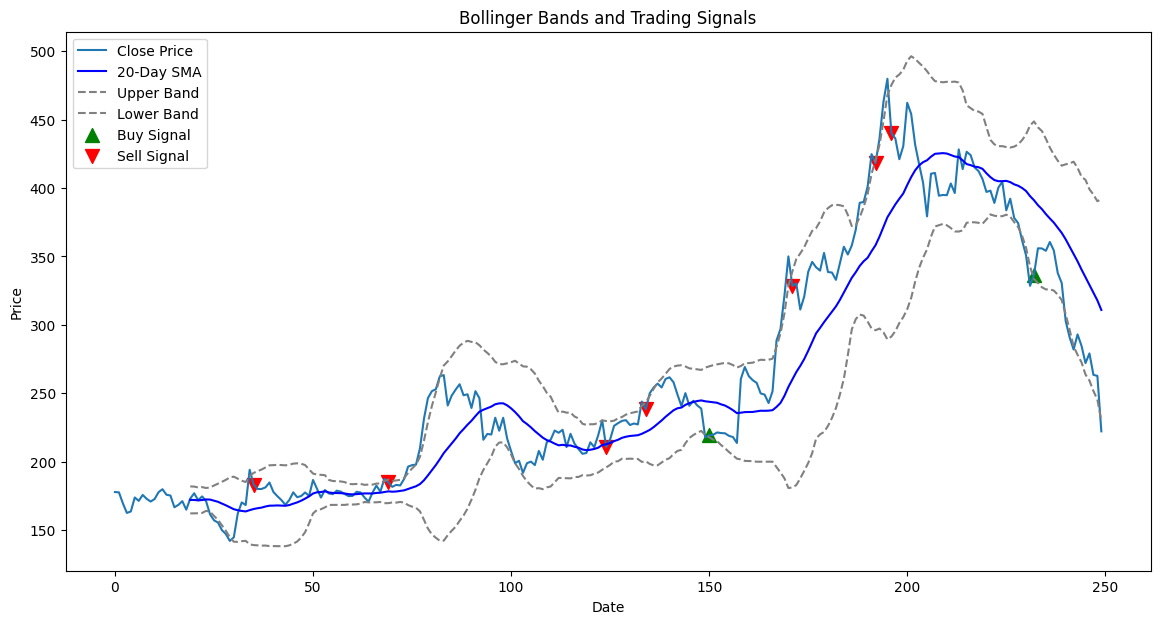

In [51]:
trader.plot_strategy()

## 2. Eli Lilly

In [52]:
trader = TradingProfessional(Close('LLY'))
trader.calculate_bollinger_bands()
trader.generate_signals()
trader.backtest_strategy()

[*********************100%***********************]  1 of 1 completed


,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
0,NaN,NaN,NaN,NaN
1,0.028024,0.000000,1.028024,1.000000
2,0.003828,0.000000,1.031959,1.000000
3,0.003813,0.000000,1.035895,1.000000
4,-0.008623,-0.000000,1.026962,1.000000
...,...,...,...,...
245,-0.020071,-0.020071,1.248661,1.253852
246,0.020482,0.020482,1.274236,1.279532
247,-0.018242,-0.018242,1.250991,1.256191
248,-0.047307,-0.047307,1.191810,1.196765


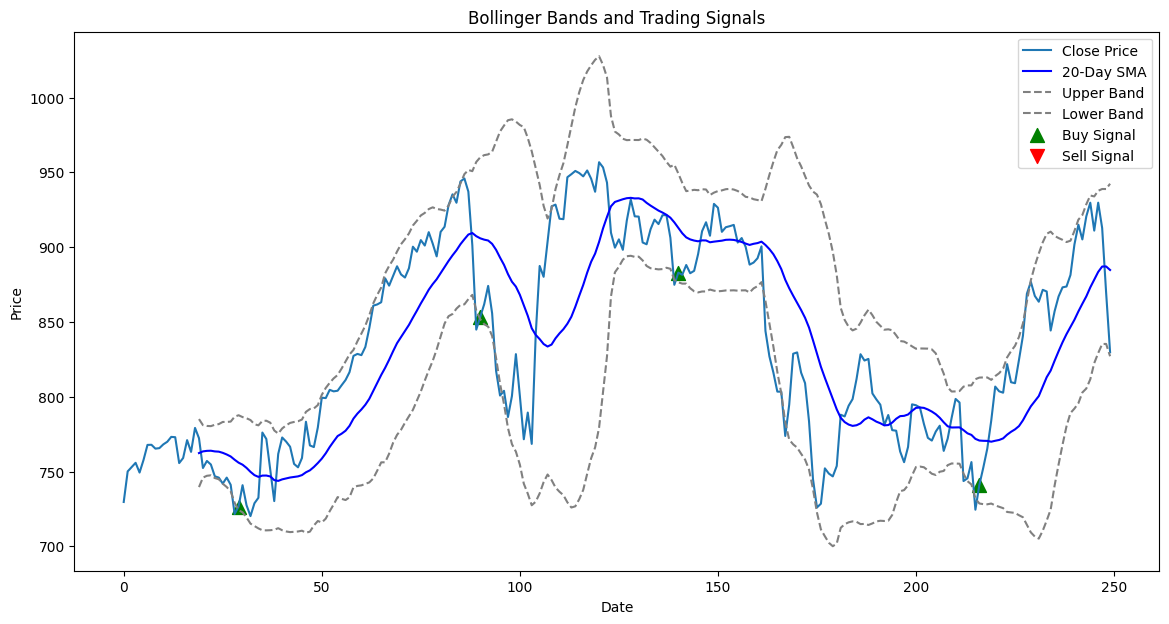

In [53]:
trader.plot_strategy()

## 3. Apple

In [54]:
trader = TradingProfessional(Close('AAPL'))
trader.calculate_bollinger_bands()
trader.generate_signals()
trader.backtest_strategy()

[*********************100%***********************]  1 of 1 completed


,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
0,NaN,NaN,NaN,NaN
1,0.002778,0.0,1.002778,1.0
2,-0.012122,-0.0,0.990622,1.0
3,0.010927,0.0,1.001447,1.0
4,-0.002197,-0.0,0.999247,1.0
...,...,...,...,...
245,-0.008822,-0.0,1.372180,1.0
246,-0.000805,-0.0,1.371075,1.0
247,-0.001739,-0.0,1.368690,1.0
248,0.015893,0.0,1.390442,1.0


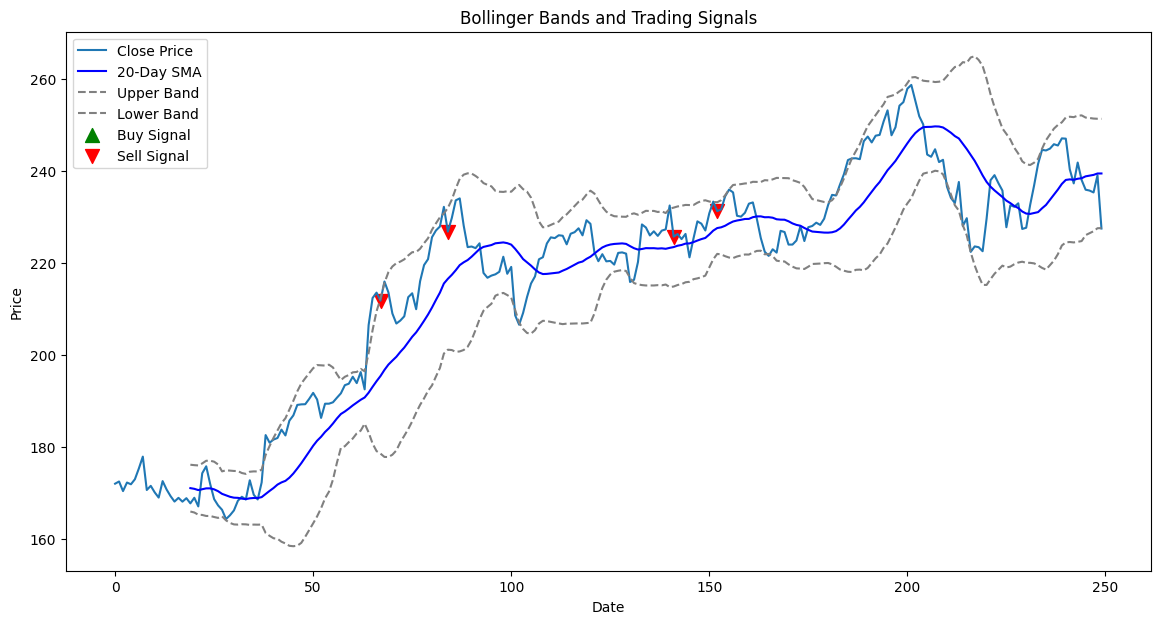

In [55]:
trader.plot_strategy()

## 4. Qualcomm

In [56]:
trader = TradingProfessional(Close('QCOM'))
trader.calculate_bollinger_bands()
trader.generate_signals()
trader.backtest_strategy()

[*********************100%***********************]  1 of 1 completed


,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
0,NaN,NaN,NaN,NaN
1,0.011454,0.000000,1.011454,1.000000
2,-0.022128,-0.000000,0.989072,1.000000
3,-0.004727,-0.000000,0.984397,1.000000
4,-0.007421,-0.000000,0.977092,1.000000
...,...,...,...,...
245,0.005468,0.005468,0.915790,1.205768
246,0.026091,0.026091,0.939684,1.237227
247,-0.010150,-0.010150,0.930146,1.224670
248,0.033197,0.033197,0.961024,1.265325


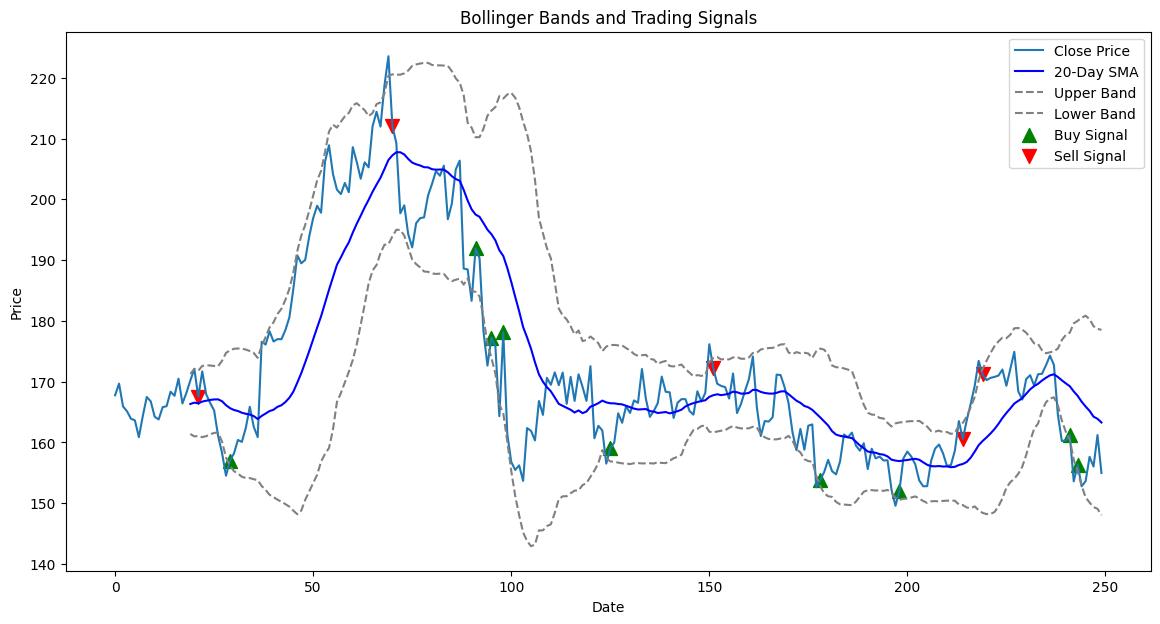

In [57]:
trader.plot_strategy()

## 5. Intel

In [58]:
trader = TradingProfessional(Close('INTC'))
trader.calculate_bollinger_bands()
trader.generate_signals()
trader.backtest_strategy()

[*********************100%***********************]  1 of 1 completed


,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
0,NaN,NaN,NaN,NaN
1,0.008471,0.0,1.008471,1.000000
2,-0.044430,-0.0,0.963665,1.000000
3,-0.011103,-0.0,0.952965,1.000000
4,-0.002573,-0.0,0.950513,1.000000
...,...,...,...,...
245,-0.062005,-0.0,0.480439,1.079741
246,-0.024379,-0.0,0.468726,1.079741
247,-0.002883,-0.0,0.467375,1.079741
248,-0.005301,-0.0,0.464897,1.079741


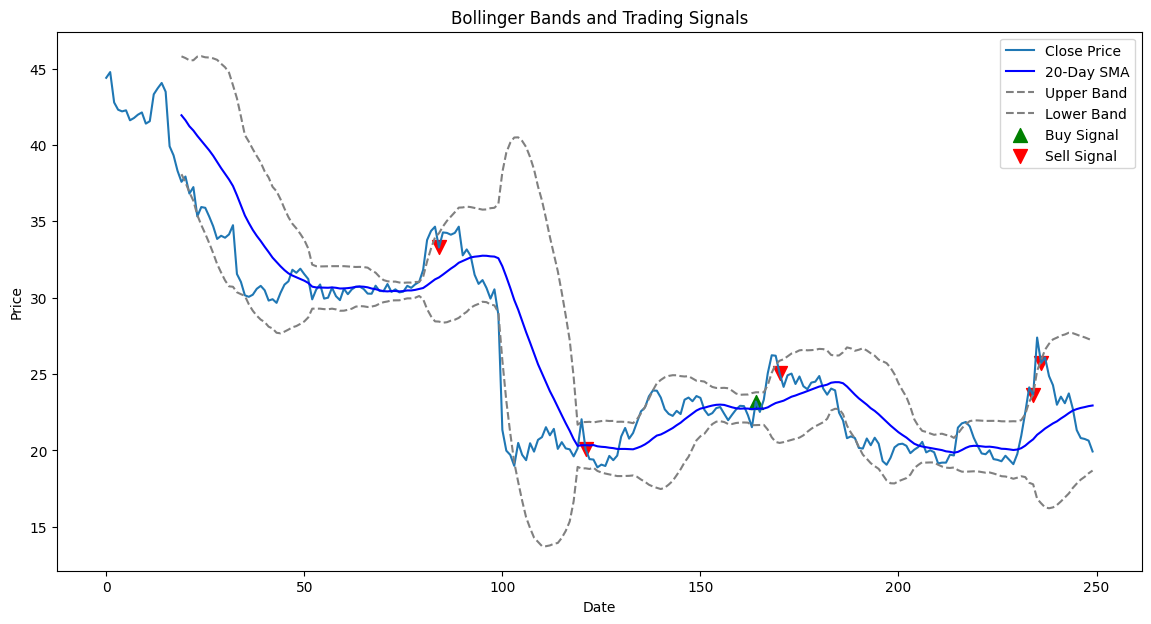

In [59]:
trader.plot_strategy()